# **The Problem & Business Importance**

> Problem
For sustainable growth, hotels need data-driven insights to predict customer churn and optimize room pricing.

Business Importance

> Business Importance



# **Importing Libraries & Reading Files**





In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [18]:
df_host = pd.read_csv('host_data.csv')
df_loc = pd.read_csv('location_data.csv')
df_pric = pd.read_csv('pricing_data.csv')
df_prop = pd.read_csv('property_data.csv')

df_rev = pd.read_csv('review_data.csv')

In [19]:
df_rev[df_rev['number_of_reviews'] != 0]


,customer_id,number_of_reviews,review_scores_rating,first_review,last_review
2,OMm373CPtgtCt3dep7huwYt2G9uGUOPhEG7JkE8ZAvKlMp...,26,91.0,2017-01-01,11/23/2018
4,837RAwLA6dEkJQHyGasNKdV3nZnunANTprjIo7J8C5wZL6...,64,98.0,2011-08-29,09/28/2018
5,vluvHQELAYt0oheoPGKn9ab3V08h7JRcg8Ena04e8UQ1QK...,42,88.0,2017-06-17,11/19/2018
7,0u0WBsL8wj7ua8vhAN4Zd9wrkePcIoAZC2l3JYv6NjRUD5...,2,100.0,2017-09-09,11/09/2018
9,r0sQ2NM3gVdpdGrpkEFxmAcEpDI8N6GSpz0mN5Z6biJbwZ...,8,95.0,2016-10-23,06/11/2018
...,...,...,...,...,...
69540,dm4hJqlJYKvVNlpOUHDE4eGgZtH3WjEDbGy7NPQSnwnZ5S...,6,93.0,2016-04-30,07/30/2017
69541,f2BOUClwcSJFylWFm9ZZbmT33NN5zfrEC9acLFniZftsMG...,2,100.0,2017-08-06,10/06/2018
69542,owkLdHeTXuNky7id8h0OCRjocypRtUlBklyBzCTgt0qc57...,12,100.0,2015-10-11,03/30/2018
69544,HuiGLAnSeU06GTAp8IL4DUWz1fAKG9n3aU6K46MdGBssGz...,14,94.0,2017-07-08,10/28/2018


# **Data Identification & Analysis**


> Results of code below shows us interestingly that **'customer_id'** is present in all five datasets.




In [20]:
print(df_host.columns)
print(df_loc.columns)
print(df_pric.columns)
print(df_rev.columns)
print(df_prop.columns)

Index(['customer_id', 'host_since', 'host_response_rate',
       'host_has_profile_pic', 'host_identity_verified'],
      dtype='object')
Index(['customer_id', 'neighbourhood', 'latitude', 'longitude', 'city',
       'zipcode'],
      dtype='object')
Index(['customer_id', 'log_price', 'cleaning_fee', 'cancellation_policy'], dtype='object')
Index(['customer_id', 'number_of_reviews', 'review_scores_rating',
       'first_review', 'last_review'],
      dtype='object')
Index(['customer_id', 'property_type', 'room_type', 'bedrooms', 'bathrooms',
       'accommodates', 'beds'],
      dtype='object')




> This makes merging all datasets possible.




In [21]:
merge1 = pd.merge(df_host , df_loc , on='customer_id')
merge2 = pd.merge(merge1 , df_pric , on='customer_id')
merge3 = pd.merge(merge2 , df_prop , on='customer_id')
df = pd.merge(merge2 , df_prop , on='customer_id')
#df = pd.merge(merge3 , df_rev , on='customer_id' )
#For now not merging the df_rev, due to incomplete values of the reviews.

In [22]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates(subset=['customer_id'])

Duplicates: 20460




> To get a overview and better understanding of data we do the following:


In [23]:
#Info on all columns of the merged dataset "df"
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68182 entries, 0 to 88641
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             68182 non-null  object 
 1   host_since              68016 non-null  object 
 2   host_response_rate      51316 non-null  object 
 3   host_has_profile_pic    68016 non-null  object 
 4   host_identity_verified  68016 non-null  object 
 5   neighbourhood           58814 non-null  object 
 6   latitude                68182 non-null  float64
 7   longitude               68182 non-null  float64
 8   city                    68182 non-null  object 
 9   zipcode                 67306 non-null  object 
 10  log_price               68182 non-null  float64
 11  cleaning_fee            68182 non-null  bool   
 12  cancellation_policy     68182 non-null  object 
 13  property_type           68182 non-null  object 
 14  room_type               68182 non-null  obj

In [24]:
#Summary Statistics for all numerical values.
df.describe()


,latitude,longitude,log_price,bedrooms,bathrooms,accommodates,beds
count,68182.000000,68182.000000,68182.000000,68102.000000,68005.000000,68182.000000,68070.000000
mean,38.451586,-92.380279,4.651185,1.243796,1.235711,3.156244,1.711165
std,3.079089,21.702499,0.781907,0.878027,0.583663,2.158653,1.254449
min,33.338905,-122.511500,0.120000,-1.000000,0.000000,1.000000,0.000000
25%,34.128665,-118.342356,4.000000,1.000000,1.000000,2.000000,1.000000
50%,40.662825,-76.996166,4.715120,1.000000,1.000000,2.000000,1.000000
75%,40.746423,-73.954541,5.000000,1.000000,1.000000,4.000000,2.000000
max,42.390437,-70.985047,7.718399,10.000000,8.000000,16.000000,18.000000


In [25]:
#All values of all columns of first 5 rows
df.head()

,customer_id,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,city,zipcode,log_price,cleaning_fee,cancellation_policy,property_type,room_type,bedrooms,bathrooms,accommodates,beds
0,4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...,10/07/2013,100%,t,t,Columbia Heights,38.921768,-77.030985,DC,20009,4.000000,False,moderate,house,private room,1.0,1.0,2,1.0
1,XDBcz6zYzSF6AUGPCClRRhP6XjeHOHKCiybvgaevRF6J5Q...,07/10/2014,NaN,t,f,Westlake,34.057546,-118.288971,LA,90005,4.368495,False,flexible,apartment,entire home/apt,0.0,1.0,2,1.0
2,OMm373CPtgtCt3dep7huwYt2G9uGUOPhEG7JkE8ZAvKlMp...,10/26/2016,100%,t,t,East New York,40.661924,-73.867641,NYC,11208.0,3.000000,True,strict,HOUSE,private room,1.0,1.0,2,1.0
3,OegBpWwCIpG3oc6jLqfYPpBRCCwGrcVh2xQsiUoZXSEtPp...,07/06/2016,NaN,t,t,South Pasadena,34.109652,-118.175605,LA,90042,5.413305,True,flexible,villa,entire home/apt,1.0,1.0,3,1.0
4,837RAwLA6dEkJQHyGasNKdV3nZnunANTprjIo7J8C5wZL6...,10/03/2012,100%,t,f,Upper East Side,40.766836,-73.959440,NYC,10021,5.249899,True,strict,apartment,entire home/apt,1.0,1.0,2,1.0


In [26]:
#All values of all columns of last 5 rows
df.tail()

,customer_id,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,city,zipcode,log_price,cleaning_fee,cancellation_policy,property_type,room_type,bedrooms,bathrooms,accommodates,beds
88637,f2BOUClwcSJFylWFm9ZZbmT33NN5zfrEC9acLFniZftsMG...,11/22/2017,100%,t,t,Carroll Gardens,40.682925,-73.997469,NYC,11231.0,5.823782,True,strict,townhouse,ENTIRE HOME/APT,5.0,2.5,12,8.0
88638,owkLdHeTXuNky7id8h0OCRjocypRtUlBklyBzCTgt0qc57...,05/30/2016,60%,t,t,NaN,34.205908,-118.572788,LA,91306,4.294387,True,strict,house,PRIVATE ROOM,1.0,1.5,4,1.0
88639,rjooqKTDjUIHetuaCmvRgqsdCrwny9xJXw0aCMmB4xQUJp...,09/30/2015,97%,t,t,Bushwick,40.689701,-73.906398,NYC,11207,3.991201,True,flexible,NONE,PRIVATE ROOM,1.0,1.0,2,1.0
88640,HuiGLAnSeU06GTAp8IL4DUWz1fAKG9n3aU6K46MdGBssGz...,11/21/2017,100%,t,f,Flatiron District,40.743522,-73.986369,NYC,10016,5.000000,True,strict,CONDOMINIUM,entire home/apt,2.0,1.0,6,3.0
88641,w7l65QhimlS0j0iOQkHzqXOx7zFWJJ5CHf7s5J7ueFP3Jc...,09/10/2010,88%,t,t,West End,42.364175,-71.063204,Boston,02114,5.000000,True,super_strict_30,apartment,entire home/apt,2.0,2.0,4,2.0


#Change the date

In [27]:
df['host_since'] = pd.to_datetime(df['host_since'])


# **Data Preparing, Cleaning and Visualization**


In [28]:
df.isna().sum()

customer_id                   0
host_since                  166
host_response_rate        16866
host_has_profile_pic        166
host_identity_verified      166
neighbourhood              9368
latitude                      0
longitude                     0
city                          0
zipcode                     876
log_price                     0
cleaning_fee                  0
cancellation_policy           0
property_type                 0
room_type                     0
bedrooms                     80
bathrooms                   177
accommodates                  0
beds                        112
dtype: int64

In [29]:
#Change customerid to int
df['customer_id'] = pd.factorize(df['customer_id'])[0] + 1
#host_response_rate to int
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.rstrip('%'))
#Change host_since to a numeric value ( we calculate the duration)
df['host_since'] = ((pd.to_datetime(datetime.now()) - df['host_since']).dt.days) / 365
#Change t/f to True and False
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': True, 'f': False}).astype(bool)
df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False}).astype(bool)
#Capatalize values in room_type and property_type to have a uniform standard between values
df['room_type'] = df['room_type'].str.upper()
df['property_type'] = df['property_type'].str.upper()


In [30]:
df_temp = df.drop([ 'neighbourhood' , 'cancellation_policy'], axis=1)
df_temp_w_dummies = pd.get_dummies(df_temp, columns=['city', 'property_type', 'room_type'], drop_first=True)

for col in df_temp_w_dummies.columns: 
    df_temp_w_dummies[col] = pd.to_numeric(df_temp_w_dummies[col], errors='coerce')

df_temp_w_dummies.isna().sum()

customer_id                               0
host_since                              166
host_response_rate                    16866
host_has_profile_pic                      0
host_identity_verified                    0
latitude                                  0
longitude                                 0
zipcode                                 894
log_price                                 0
cleaning_fee                              0
bedrooms                                 80
bathrooms                               177
accommodates                              0
beds                                    112
city_Chicago                              0
city_DC                                   0
city_LA                                   0
city_NYC                                  0
city_SF                                   0
property_type_ BED & BREAKFAST            0
property_type_ BOAT                       0
property_type_ BOUTIQUE HOTEL             0
property_type_ BUNGALOW         

In [31]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_temp_w_dummies)
df_imputed = pd.DataFrame(df_imputed, columns=df_temp_w_dummies.columns)

In [32]:
corr_matrix = df_imputed.corr()
cors = corr_matrix['log_price'][abs(corr_matrix['log_price']) > 0.2]
cors = cors.drop('log_price')
cors = cors.sort_values(ascending=False)
print(cors)



accommodates                0.517823
bedrooms                    0.418789
beds                        0.403074
bathrooms                   0.325910
room_type_ SHARED ROOM     -0.202948
room_type_ PRIVATE ROOM    -0.478096
Name: log_price, dtype: float64


In [34]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


X = df_imputed.drop('log_price', axis=1)
y = df_imputed['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

train_score = xgb_model.score(X_train, y_train)
test_score = xgb_model.score(X_test, y_test)

y_pred = xgb_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"MSE: {mse}, MAE: {mae}")

Train Score: 0.6543593845689832
Test Score: 0.5628517413678049
MSE: 0.2696839368668561, MAE: 0.39290509038058874


In [35]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = df_imputed.drop('log_price', axis=1)
y = df_imputed['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor()

param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [200, 300],
    'max_depth': [7, 9, 11],
    'gamma': [0],
    'alpha': [1 , 2 , 3],
    'lambda': [1 , 2 , 3]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"MSE: {mse}, MAE: {mae}")
print(f"Best Parameters: {grid_search.best_params_}")

Train Score: 0.6515822226997128
Test Score: 0.569058901317714
MSE: 0.26585463799856934, MAE: 0.3890547134832116
Best Parameters: {'alpha': 2, 'gamma': 0, 'lambda': 3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df_imputed.drop('log_price', axis=1)
y = df_imputed['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)

train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"MSE: {mse}, MAE: {mae}")

Train Score: 0.9373255450264405
Test Score: 0.5703921404530852
MSE: 0.28312848387185957, MAE: 0.41440759439592856


In [40]:
Q1 = df_imputed.quantile(0.25)
Q3 = df_imputed.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers_IQR = df_imputed[~((df_imputed < lower_bound) | (df_imputed > upper_bound)).any(axis=1)]
print(df_no_outliers_IQR.shape)
print(df_imputed.shape)

(17677, 56)
(68182, 56)


In [39]:
from scipy.stats import zscore

z_scores = zscore(df_imputed)
df_no_outliers_zscore = df_imputed[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]
print(df_no_outliers_zscore.shape)
print(df_imputed.shape)

(40674, 56)
(68182, 56)


In [38]:
from sklearn.model_selection import GridSearchCV
X = df_no_outliers_zscore.drop('log_price', axis=1)
y = df_no_outliers_zscore['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor()

param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [200, 300],
    'max_depth': [7, 9, 11],
    'gamma': [0],
    'alpha': [1 , 2 , 3],
    'lambda': [1 , 2 , 3]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"MSE: {mse}, MAE: {mae}")
print(f"Best Parameters: {grid_search.best_params_}")

Train Score: 0.6504280272939998
Test Score: 0.5203548763754962
MSE: 0.21848366926961538, MAE: 0.3592486906525918
Best Parameters: {'alpha': 3, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


To Do - Adnane
* clean value names seen in graphs below.

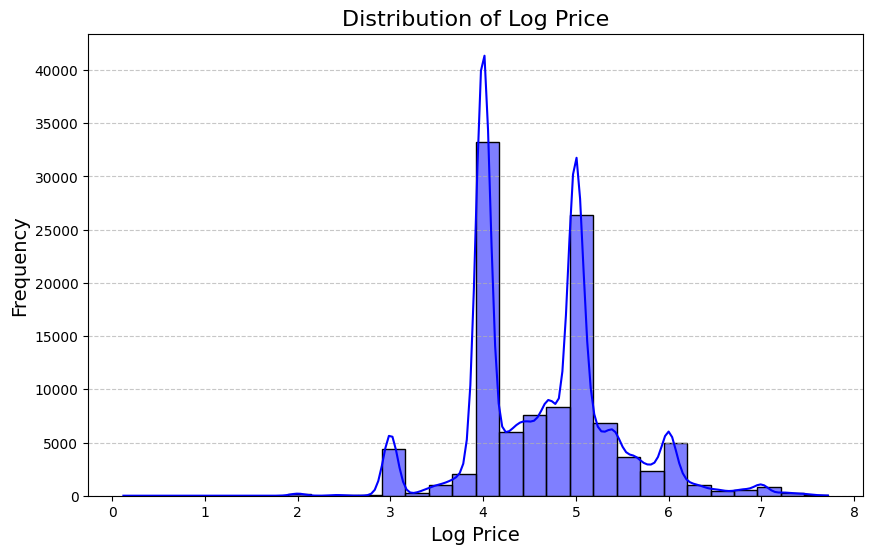

C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', palette='viridis')


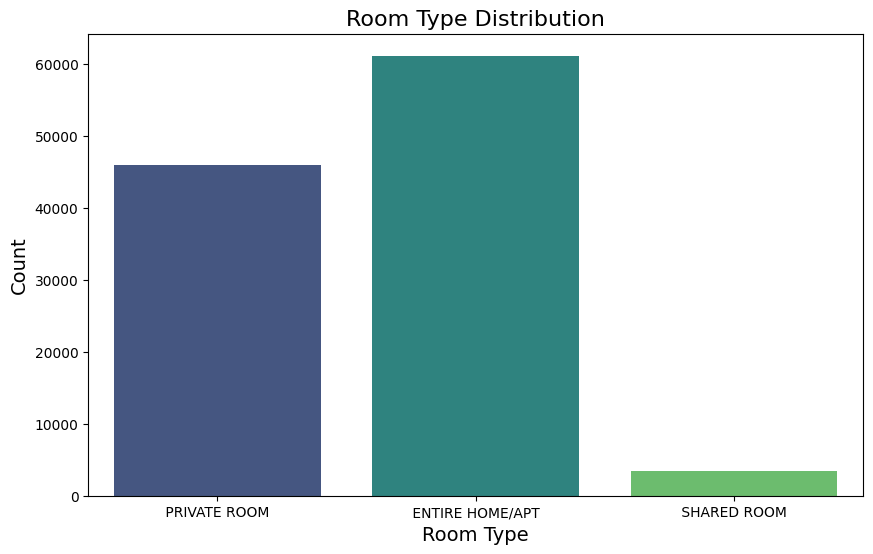

C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['property_type'].isin(top_property_types)], y='property_type', palette='coolwarm', order=top_property_types)


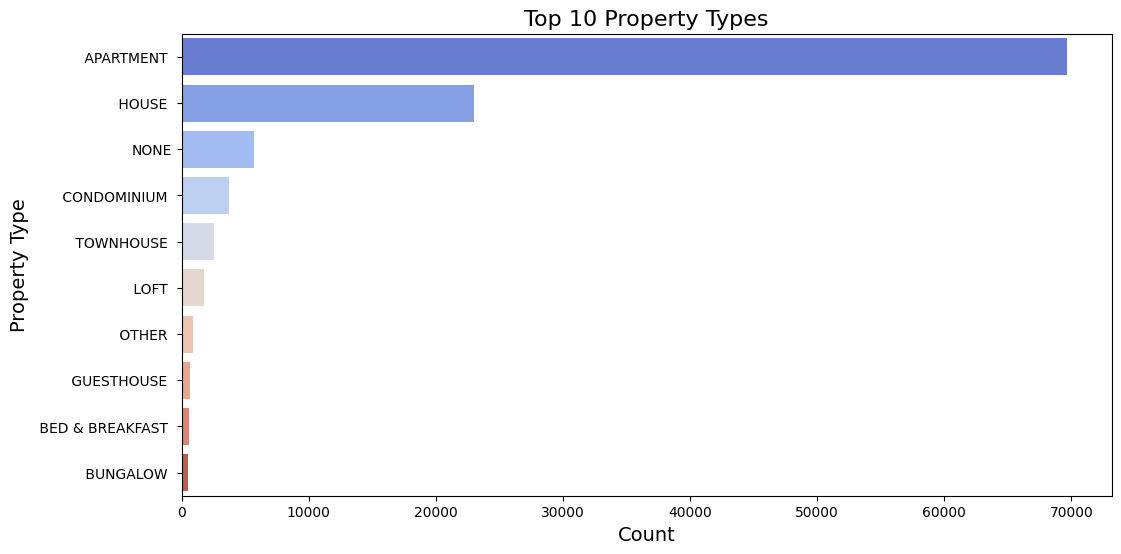

C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='accommodates', y='log_price', palette='Spectral')


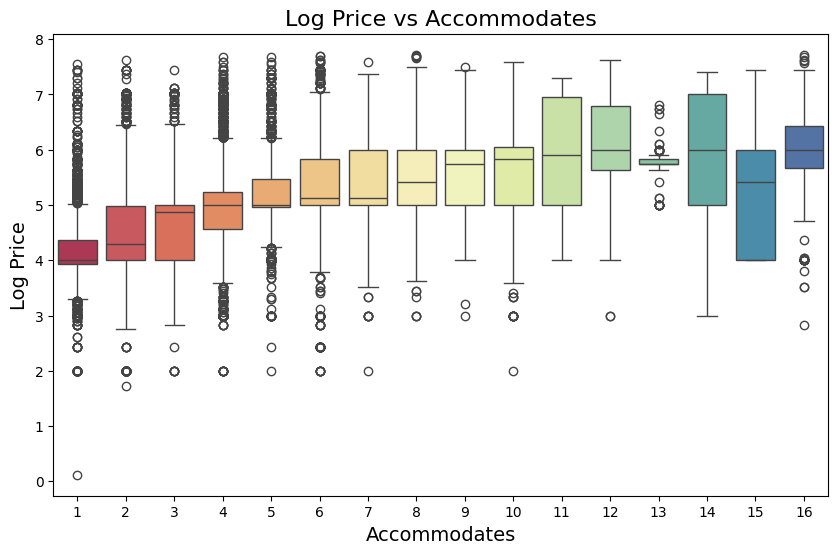

C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cancellation_policy', palette='magma')


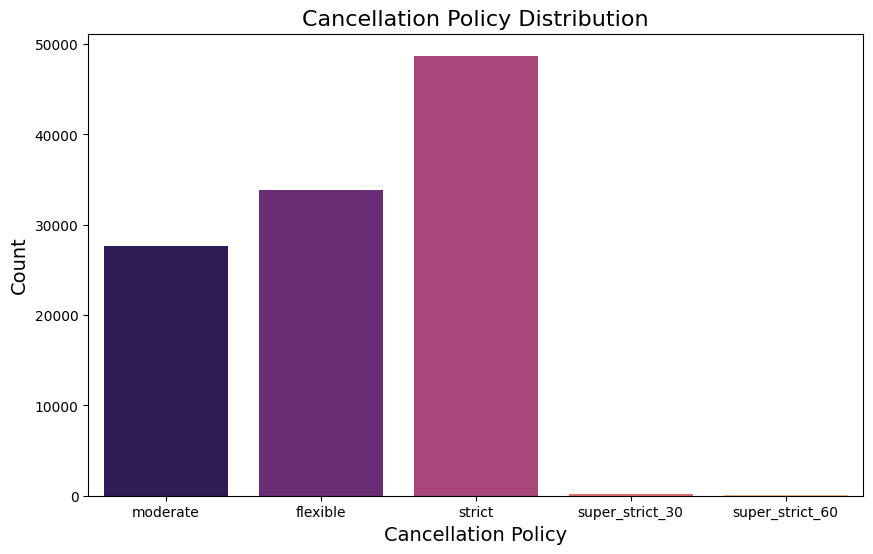

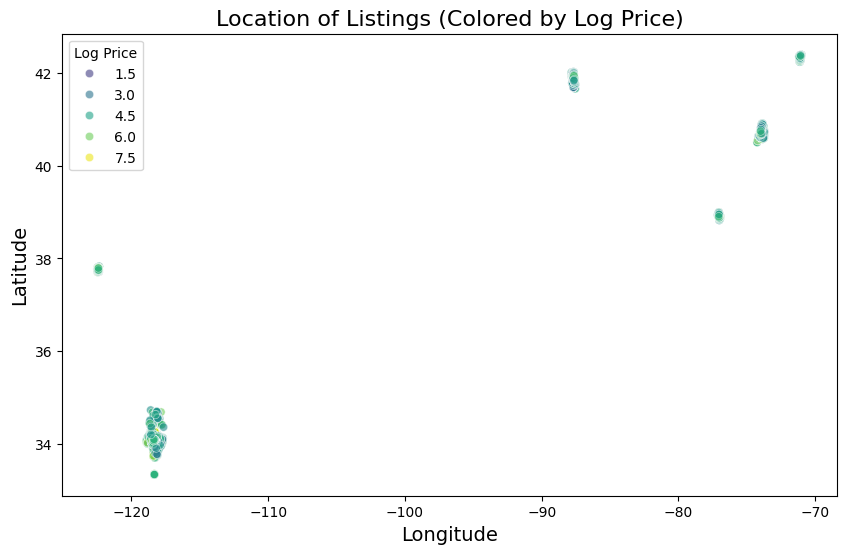

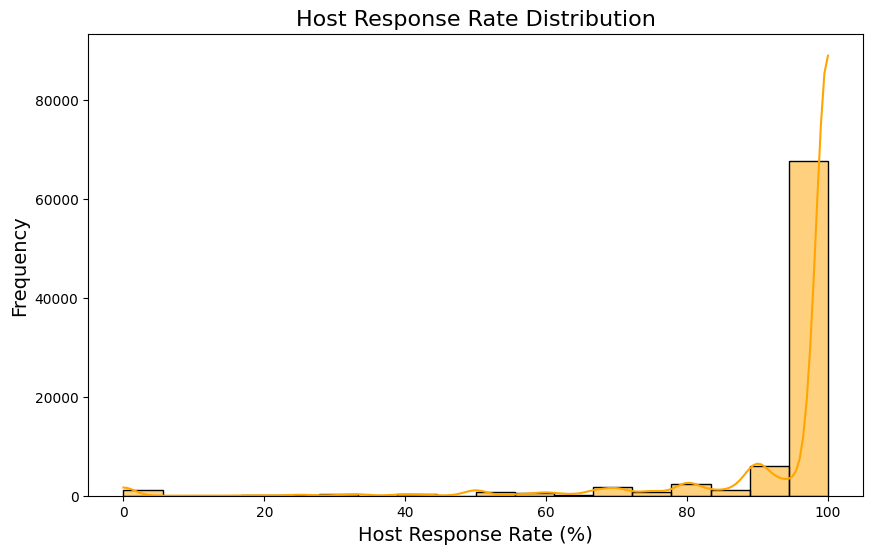

C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bedrooms', y='log_price', palette='cool')


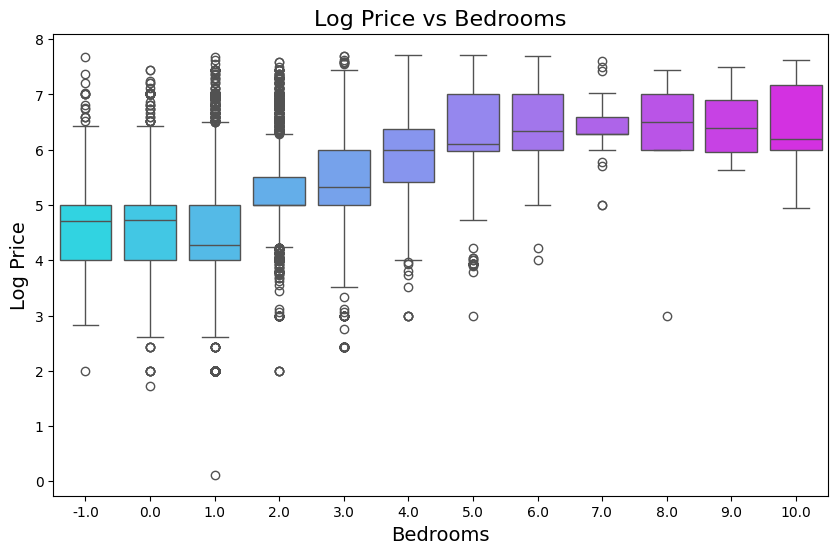

C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bathrooms', y='log_price', palette='viridis')


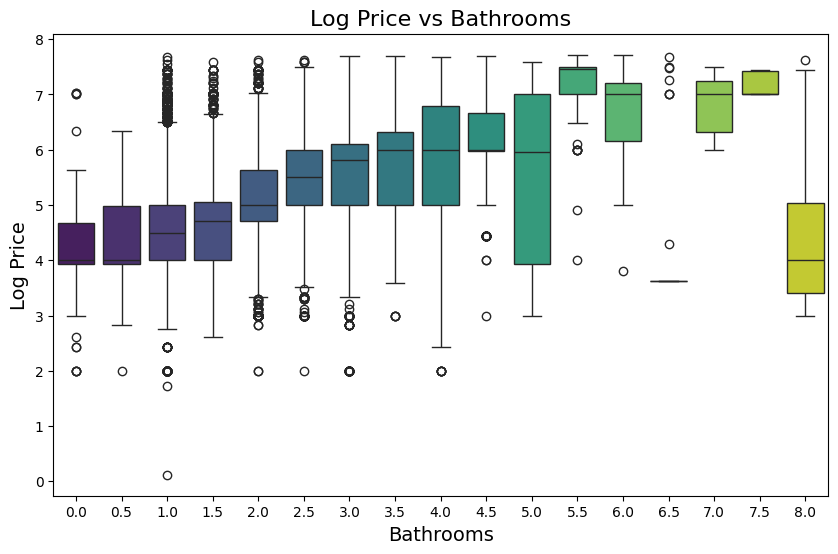

C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='beds', y='log_price', palette='plasma')


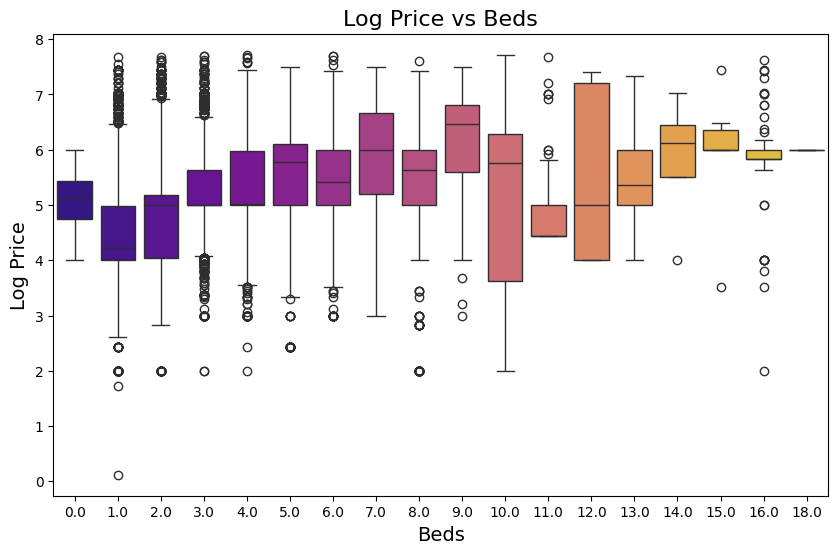

C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='city', palette='tab10', order=df['city'].value_counts().index)


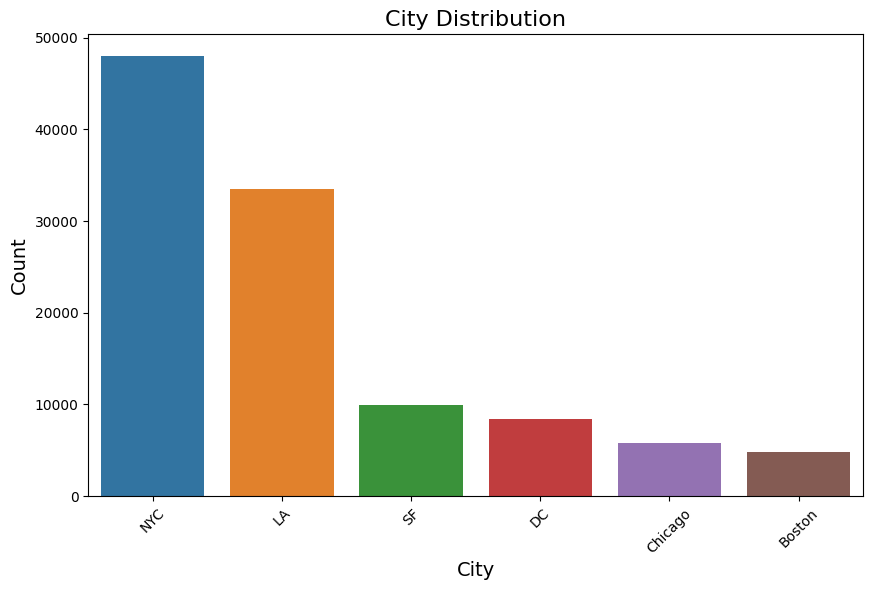

C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:97: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['neighbourhood'].isin(top_neighbourhoods)],
C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['neighbourhood'].isin(top_neighbourhoods)],


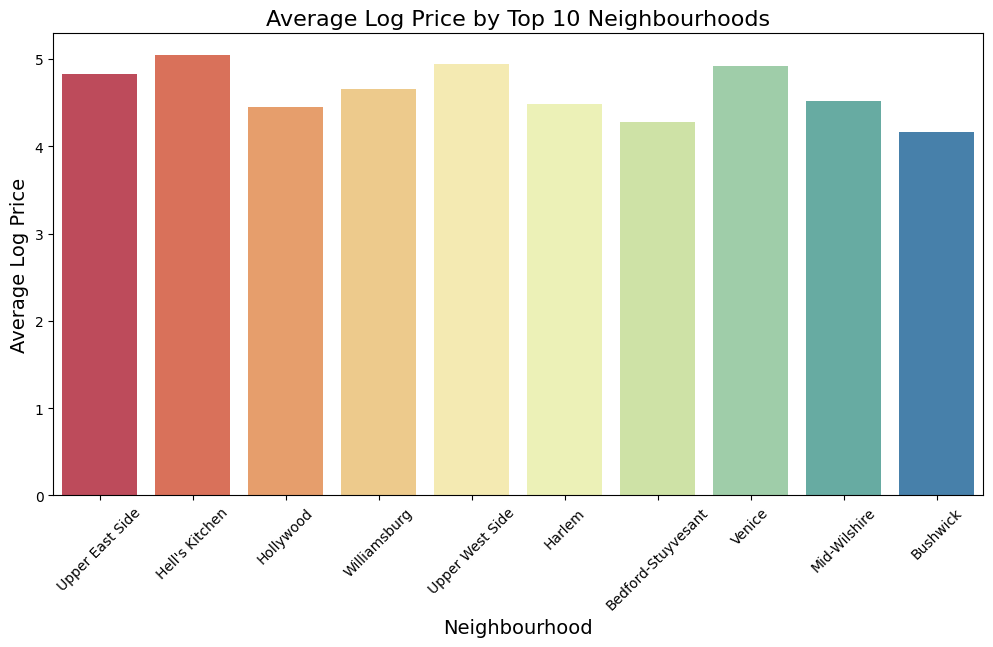

C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:107: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='cleaning_fee', y='log_price', palette='viridis', ci=None)
C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='cleaning_fee', y='log_price', palette='viridis', ci=None)


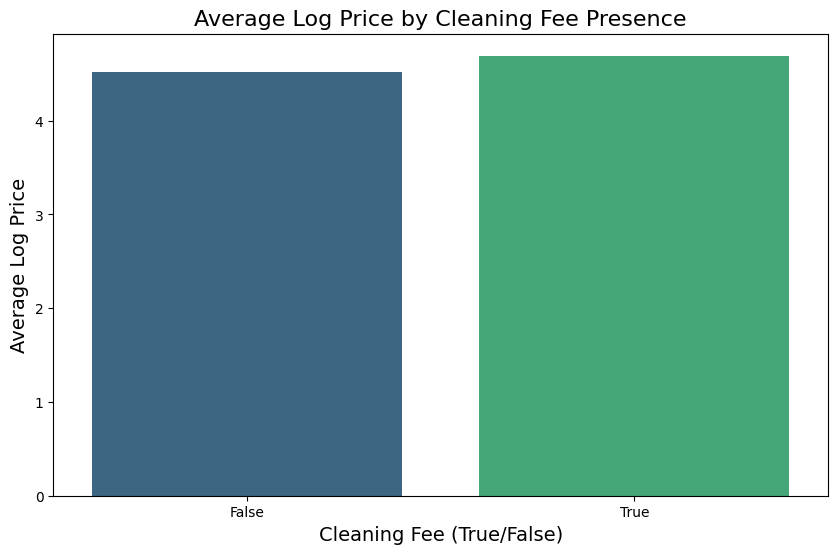

C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:115: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='host_identity_verified', y='log_price', palette='coolwarm', ci=None)
C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='host_identity_verified', y='log_price', palette='coolwarm', ci=None)


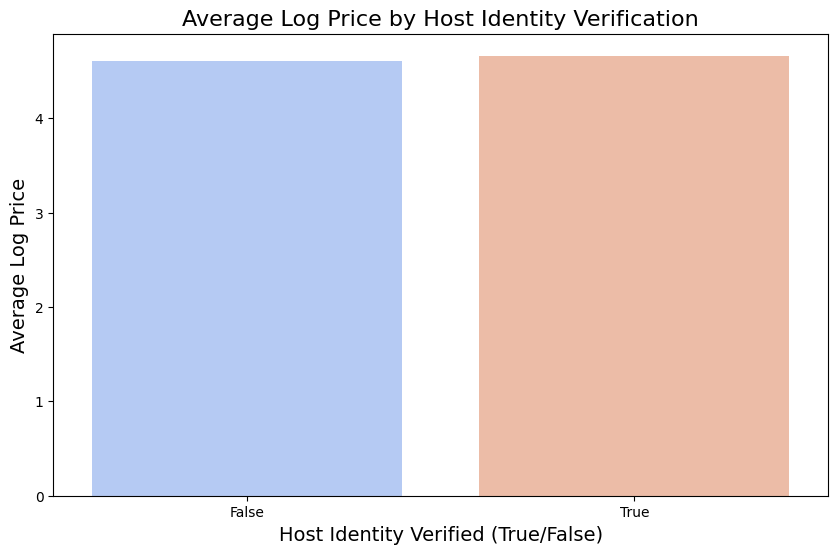

C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:123: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='host_has_profile_pic', y='log_price', palette='Set2', ci=None)
C:\Users\dvana\AppData\Local\Temp\ipykernel_2448\1851051062.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='host_has_profile_pic', y='log_price', palette='Set2', ci=None)


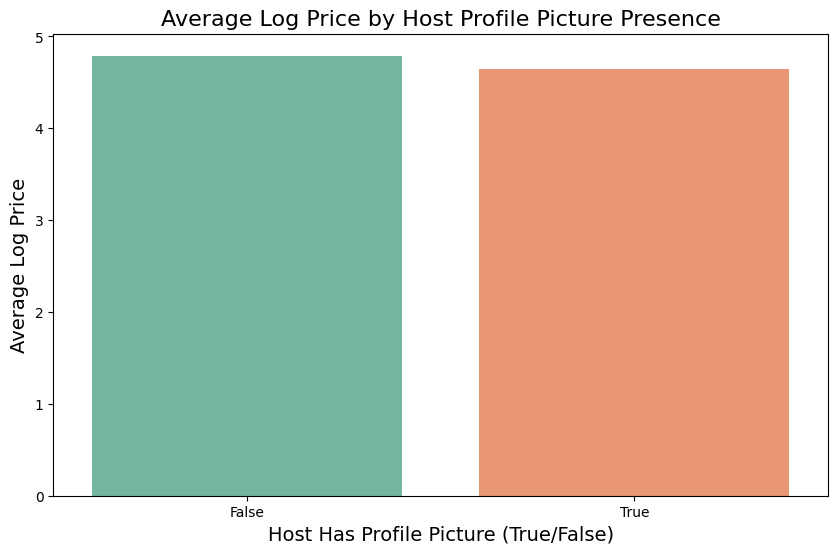

In [ ]:
# 1. Distribution of `log_price`
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Log Price', fontsize=16)
plt.xlabel('Log Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Countplot for `room_type`
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_type', palette='viridis')
plt.title('Room Type Distribution', fontsize=16)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# 3. Countplot for `property_type` (top 10 most common types)
plt.figure(figsize=(12, 6))
top_property_types = df['property_type'].value_counts().nlargest(10).index
sns.countplot(data=df[df['property_type'].isin(top_property_types)], y='property_type', palette='coolwarm', order=top_property_types)
plt.title('Top 10 Property Types', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Property Type', fontsize=14)
plt.show()

# 4. Boxplot for `accommodates` vs `log_price`
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='accommodates', y='log_price', palette='Spectral')
plt.title('Log Price vs Accommodates', fontsize=16)
plt.xlabel('Accommodates', fontsize=14)
plt.ylabel('Log Price', fontsize=14)
plt.show()

# 5. Countplot for `cancellation_policy`
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cancellation_policy', palette='magma')
plt.title('Cancellation Policy Distribution', fontsize=16)
plt.xlabel('Cancellation Policy', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# 6. Scatterplot for `latitude` and `longitude` colored by `log_price`
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='log_price', palette='viridis', alpha=0.6)
plt.title('Location of Listings (Colored by Log Price)', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(title='Log Price')
plt.show()

# 7. Barplot for `host_response_rate` (if numeric)
if df['host_response_rate'].dtype != object:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['host_response_rate'], kde=True, color='orange', edgecolor='black')
    plt.title('Host Response Rate Distribution', fontsize=16)
    plt.xlabel('Host Response Rate (%)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

# 8. Boxplot for `bedrooms` vs `log_price`
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bedrooms', y='log_price', palette='cool')
plt.title('Log Price vs Bedrooms', fontsize=16)
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Log Price', fontsize=14)
plt.show()

# 9. Boxplot for `bathrooms` vs `log_price`
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bathrooms', y='log_price', palette='viridis')
plt.title('Log Price vs Bathrooms', fontsize=16)
plt.xlabel('Bathrooms', fontsize=14)
plt.ylabel('Log Price', fontsize=14)
plt.show()

# 10. Boxplot for `beds` vs `log_price`
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='beds', y='log_price', palette='plasma')
plt.title('Log Price vs Beds', fontsize=16)
plt.xlabel('Beds', fontsize=14)
plt.ylabel('Log Price', fontsize=14)
plt.show()

# 11. Countplot for `city`
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='city', palette='tab10', order=df['city'].value_counts().index)
plt.title('City Distribution', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 12. Barplot for `neighbourhood` (Top 10 most common)
plt.figure(figsize=(12, 6))
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(10).index
sns.barplot(data=df[df['neighbourhood'].isin(top_neighbourhoods)],
            x='neighbourhood', y='log_price', estimator='mean', palette='Spectral', ci=None)
plt.title('Average Log Price by Top 10 Neighbourhoods', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Average Log Price', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 13. Barplot for `cleaning_fee` vs `log_price`
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='cleaning_fee', y='log_price', palette='viridis', ci=None)
plt.title('Average Log Price by Cleaning Fee Presence', fontsize=16)
plt.xlabel('Cleaning Fee (True/False)', fontsize=14)
plt.ylabel('Average Log Price', fontsize=14)
plt.show()

# 14. Barplot for `host_identity_verified` vs `log_price`
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='host_identity_verified', y='log_price', palette='coolwarm', ci=None)
plt.title('Average Log Price by Host Identity Verification', fontsize=16)
plt.xlabel('Host Identity Verified (True/False)', fontsize=14)
plt.ylabel('Average Log Price', fontsize=14)
plt.show()

# 15. Barplot for `host_has_profile_pic` vs `log_price`
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='host_has_profile_pic', y='log_price', palette='Set2', ci=None)
plt.title('Average Log Price by Host Profile Picture Presence', fontsize=16)
plt.xlabel('Host Has Profile Picture (True/False)', fontsize=14)
plt.ylabel('Average Log Price', fontsize=14)
plt.show()


